# Project Name: Rocket Simulation project by using Machine learning

Contributer: Rajeev singh sisodiya

Project Details: Rocket simulation is a complex and computationally intensive task, typically involving the modeling of fluid dynamics, thermodynamics, structural mechanics, and other physical processes. Machine learning can be used in conjunction with traditional simulation methods to improve certain aspects of rocket design and operation. Here are some ways in which machine learning can be applied to rocket simulation:

Aerodynamic Design: Machine learning models can help optimize rocket shape and design for better aerodynamic performance. Neural networks can be trained on historical data and simulation results to identify optimal designs more quickly than traditional iterative approaches.

Trajectory Prediction: Machine learning can be used to predict the trajectory of a rocket during flight, taking into account atmospheric conditions and other variables. This can help in improving guidance and control systems.

Anomaly Detection: Machine learning models can be trained to detect anomalies or malfunctions in real-time during a rocket's flight. This is critical for safety and can lead to more reliable operations.

Structural Analysis: ML algorithms can assist in the structural analysis of rockets, predicting stress, strain, and failure points during launch and flight. This can help in designing more robust and lightweight rocket structures.

Propulsion Optimization: Machine learning can be used to optimize the performance of rocket engines. By analyzing combustion processes and propellant characteristics, ML can suggest ways to enhance fuel efficiency and thrust.

Materials Selection: ML models can help in selecting the right materials for rocket components, factoring in various parameters like heat resistance, weight, and durability.

Fault Diagnosis: Machine learning can be used for diagnosing faults or anomalies in rocket systems and suggesting corrective actions. This can lead to quicker response times during mission-critical situations.

Image Analysis: For rockets equipped with cameras or other sensors, machine learning can analyze real-time image and sensor data to provide insights into the rocket's condition and environment.

Operational Optimization: Machine learning can help optimize launch and mission parameters, such as scheduling, fueling, and payload deployment, to maximize mission success and cost-efficiency.

Reinforcement Learning for Control: Reinforcement learning can be used to develop autonomous control systems that adapt and learn during the rocket's flight. This can be beneficial for tasks like landing or docking.

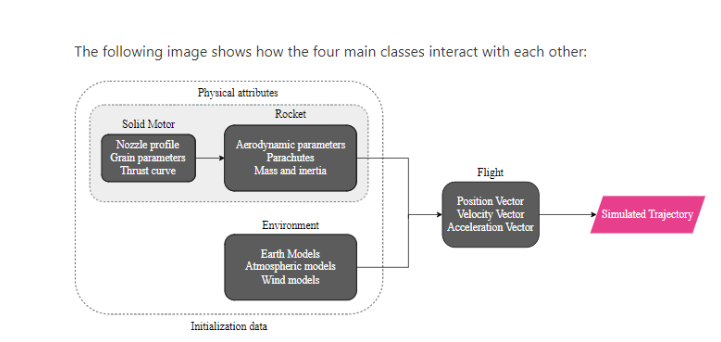

In [ ]:
pip install rocketpy

In [ ]:
%pip install rocketpy netCDF4


In [34]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [35]:
import os

In [36]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
%autoreload 2

In [38]:
from rocketpy import Environment, Rocket, SolidMotor, Flight

Setting Up a Simulation by Creating an Environment for Spaceport America

To get weather data from the GFS forecast, available online, we run the following lines.

First, we set tomorrow's date.


In [39]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

Then, we tell env to use a GFS forecast to get the atmospheric conditions for flight.

In [40]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of Gravity at Lauch Site: 9.79111266229703 m/s²


Launch Site Details

Launch Date: 2023-10-30 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.378 km
Forecast Time Period: From  2023-10-29 06:00:00  to  2023-11-14 06:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 8.05 m/s
Surface Wind Direction: 357.78°
Surface Wind Heading: 177.78°
Surface Pressure: 859.39 hPa
Surface Temperature: 274.79 K
Surface Air Density: 1.089 kg/m³
Surface Speed of Sound: 332.31 m/s


Atmospheric Model Plots



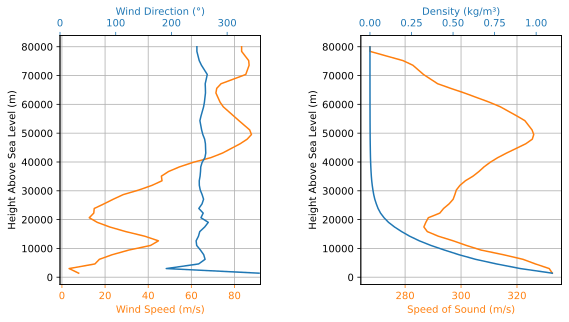

In [41]:
env.info()

Now We can see what the weather will look like by calling the info method!


In [42]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

In [43]:
help(Environment)

Help on class Environment in module rocketpy.environment.environment:

class Environment(builtins.object)
 |  Environment(gravity=None, date=None, latitude=0, longitude=0, elevation=0, datum='SIRGAS2000', timezone='UTC')
 |  
 |  Keeps all environment information stored, such as wind and temperature
 |  conditions, as well as gravity.
 |  
 |  Attributes
 |  ----------
 |  Environment.earth_radius : float
 |      Value of Earth's Radius as 6.3781e6 m.
 |  Environment.air_gas_constant : float
 |      Value of Air's Gas Constant as 287.05287 J/K/Kg
 |  Environment.gravity : float
 |      Positive value of gravitational acceleration in m/s^2.
 |  Environment.latitude : float
 |      Launch site latitude.
 |  Environment.longitude : float
 |      Launch site longitude.
 |  Environment.datum : string
 |      The desired reference ellipsoid model, the following options are
 |      available: "SAD69", "WGS84", "NAD83", and "SIRGAS2000". The default
 |      is "SIRGAS2000", then this model wil

In [44]:
env = Environment(
    latitude=32.990254,
    longitude=-106.974998,
    elevation=1400,
)

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
  (tomorrow.year, tomorrow.month, tomorrow.day, 12), timezone="America/Denver"
) # Tomorrow's date in year, month, day, hour UTC format

env.set_atmospheric_model(type='Forecast', file='GFS')

In [45]:
help(SolidMotor)

Help on class SolidMotor in module rocketpy.motors.solid_motor:

class SolidMotor(rocketpy.motors.motor.Motor)
 |  SolidMotor(thrust_source, dry_mass, dry_inertia, nozzle_radius, grain_number, grain_density, grain_outer_radius, grain_initial_inner_radius, grain_initial_height, grain_separation, grains_center_of_mass_position, center_of_dry_mass_position, nozzle_position=0, burn_time=None, throat_radius=0.01, reshape_thrust_curve=False, interpolation_method='linear', coordinate_system_orientation='nozzle_to_combustion_chamber')
 |  
 |  Class to specify characteristics and useful operations for solid motors.
 |  
 |  Inherits from the abstract class rocketpy.Motor.
 |  
 |  See Also
 |  --------
 |  Motor
 |  
 |  Attributes
 |  ----------
 |  SolidMotor.coordinate_system_orientation : str
 |      Orientation of the motor's coordinate system. The coordinate system
 |      is defined by the motor's axis of symmetry. The origin of the
 |      coordinate system may be placed anywhere along

# A sample Motor object can be created by the following code:Creating a Motor

A solid rocket motor is used in this case. To create a motor, the SolidMotor class is used and the required arguments are given.

In [46]:
Pro75M1670 = SolidMotor(
    thrust_source="/content/Cesaroni_6026M1670-P.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    center_of_dry_mass_position=0.317,
    grains_center_of_mass_position=0.397,
    burn_time=3.9,
    grain_number=5,
    grain_separation=0.005,
    grain_density=1815,
    grain_outer_radius=0.033,
    grain_initial_inner_radius=0.015,
    grain_initial_height=0.12,
    nozzle_radius=0.033,
    throat_radius=0.011,
    interpolation_method="linear",
    nozzle_position=0,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

To see what our thrust curve looks like, along with other import properties, we invoke the info method yet again.


Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns



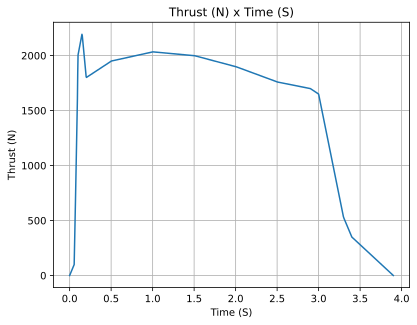

In [47]:
Pro75M1670.info()

# Creating a Rocket

Let's start by initializing our rocket, named Calisto, entering inertia properties, some dimensions and drag curves.

In [48]:
help(Rocket)

Help on class Rocket in module rocketpy.rocket.rocket:

class Rocket(builtins.object)
 |  Rocket(radius, mass, inertia, power_off_drag, power_on_drag, center_of_mass_without_motor, coordinate_system_orientation='tail_to_nose')
 |  
 |  Keeps rocket information.
 |  
 |  Attributes
 |  ----------
 |  Rocket.radius : float
 |      Rocket's largest radius in meters.
 |  Rocket.area : float
 |      Rocket's circular cross section largest frontal area in squared
 |      meters.
 |  Rocket.center_of_dry_mass_position : float
 |      Position, in m, of the rocket's center of dry mass (i.e. center of
 |      mass without propellant) relative to the rocket's coordinate system.
 |      See :doc:`Positions and Coordinate Systems </user/positions>`
 |      for more information
 |      regarding the rocket's coordinate system.
 |  Rocket.coordinate_system_orientation : string
 |      String defining the orientation of the rocket's coordinate system.
 |      The coordinate system is defined by the r

In [49]:
calisto = Rocket(
    radius=0.0635,
    mass=14.426,  # without motor
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="//content/powerOffDragCurve.csv",
    power_on_drag="/content/powerOffDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.6182,
    angular_position=45,
)


To add the motor to our rocket we need only inform what motor we are adding (Pro75M1670) and inform the position, in meters, of the motor's nozzle exit area relative to the previously defined coordinate system.

In [50]:
calisto.add_motor(Pro75M1670, position=-1.255)

Adding Aerodynamic Surfaces

In [51]:
nose = calisto.add_nose(
    length=0.55829, kind="vonKarman", position=1.278
)

fins = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.040,
    span=0.100,
    sweep_length=None,
    cant_angle=0,
    position=-1.04956,
)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)

To see all information regarding the rocket we just defined we run


Inertia Details

Rocket Mass: 14.426 kg
Rocket Dry Mass: 16.241 kg (With Motor)
Rocket Mass: 19.197 kg (With Propellant)
Rocket Inertia (with motor, but without propellant) 11: 7.864 kg*m2
Rocket Inertia (with motor, but without propellant) 22: 7.864 kg*m2
Rocket Inertia (with motor, but without propellant) 33: 0.036 kg*m2
Rocket Inertia (with motor, but without propellant) 12: 0.000 kg*m2
Rocket Inertia (with motor, but without propellant) 13: 0.000 kg*m2
Rocket Inertia (with motor, but without propellant) 23: 0.000 kg*m2


Geometrical Parameters

Rocket Maximum Radius: 0.0635 m
Rocket Frontal Area: 0.012668 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass withour Motor: 0.105 m
Rocket Center of Dry Mass - Nozzle Exit Distance: 1.150 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.753 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.116 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coeffici

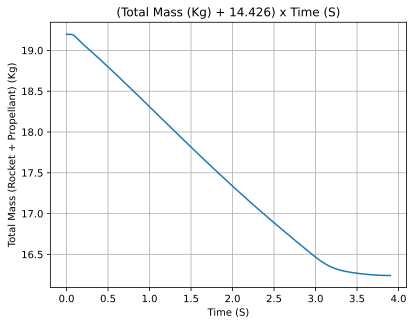

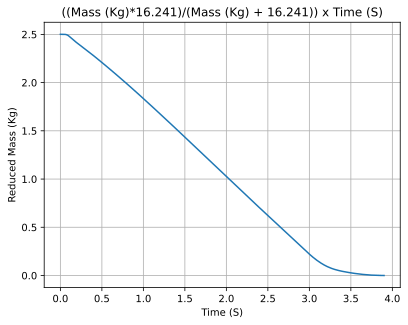


Aerodynamics Plots


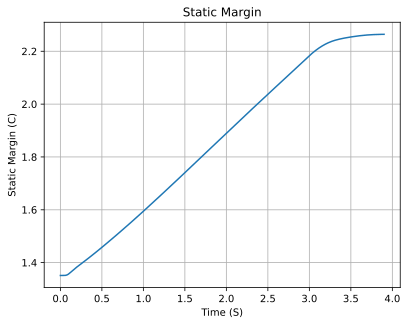

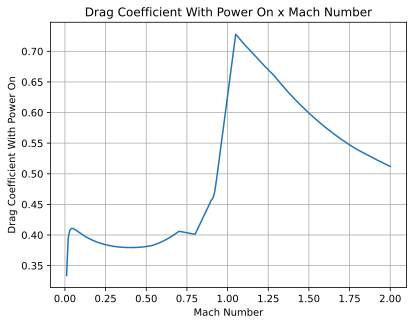

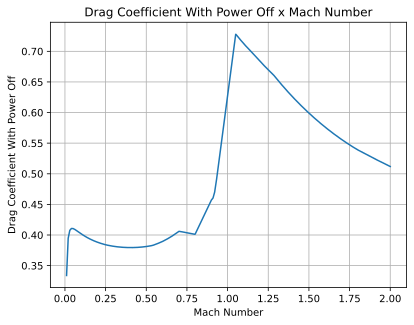

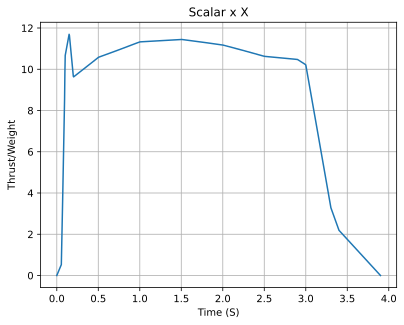

In [23]:
calisto.all_info()

Adding Parachutes

In [52]:
main = calisto.add_parachute(
    name="main",
    cd_s=10.0,
    trigger=800,  # ejection altitude in meters
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

drogue = calisto.add_parachute(
    name="drogue",
    cd_s=1.0,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)


 Alternatively, you can run the following lines to remove parachutes. Calisto.parachutes.remove(Drogue)
Calisto.parachutes.remove(Main)

Finally, you can create a Flight object to simulate your trajectory. To get help on the Flight class, use:

In [25]:
help(Flight)

Help on class Flight in module rocketpy.simulation.flight:

class Flight(builtins.object)
 |  Flight(rocket, environment, rail_length, inclination=80, heading=90, initial_solution=None, terminate_on_apogee=False, max_time=600, max_time_step=inf, min_time_step=0, rtol=1e-06, atol=[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 1e-06, 1e-06, 1e-06, 1e-06, 0.001, 0.001, 0.001], time_overshoot=True, verbose=False, name='Flight', equations_of_motion='standard')
 |  
 |  Keeps all flight information and has a method to simulate flight.
 |  
 |  Attributes
 |  ----------
 |  Flight.env : Environment
 |      Environment object describing rail length, elevation, gravity and
 |      weather condition. See Environment class for more details.
 |  Flight.rocket : Rocket
 |      Rocket class describing rocket. See Rocket class for more
 |      details.
 |  Flight.parachutes : Parachute
 |      Direct link to parachutes of the Rocket. See Rocket class
 |      for more details.
 |  Flight.frontal_surface_w

In [26]:
test_flight = Flight(
  rocket=calisto, environment=env, rail_length=5.2, inclination=85, heading=0
)

Once the Flight object is created, your simulation is done! Use the following code to get a summary of the results:


In [27]:
test_flight.info()


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1471.47 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -0.76 m/s
Lateral Surface Wind Speed: 0.45 m/s


Launch Rail

Launch Rail Length: 5.2  m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.368 s
Rail Departure Velocity: 26.207 m/s
Rail Departure Static Margin: 1.424 c
Rail Departure Angle of Attack: 1.919°
Rail Departure Thrust-Weight Ratio: 10.152
Rail Departure Reynolds Number: 2.048e+05


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 656.654 m (AGL)
Rocket velocity at burn out: 279.425 m/s
Freestream velocity at burn out: 279.427 m/s
Mach Number at burn out: 0.843
Kinetic energy at burn out: 


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 0.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 1.000 | e1: 0.000 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 180.00° | Nutation θ: -0.00° | Precession ψ: -180.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -5.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


Launch Rail

Launch Rail Length: 5.2  m
Launch Rail Inclination: 90.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.414 s
Rail Departure Velocity: 22.715 m/s
Rail Departure Static Margin: 3.687 c
Rail Departure Angle of Attack: 12.414°
Rail Departure Thrust-Weight Ratio: 7.953
Rail Departure Reynolds Number: 2.022e+05


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 490.970 m (AGL)
Rocket velocity at burn out: 210.250 m/s
Freestream velocity at burn out: 210.924 m/s
Mach Number at burn out: 0.624
Kinetic energy at burn out: 

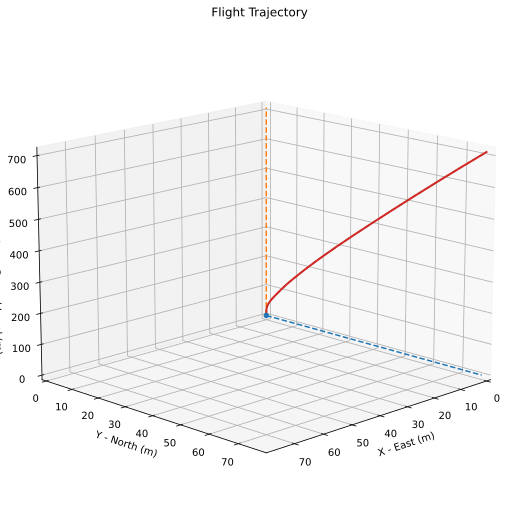



Trajectory Kinematic Plots



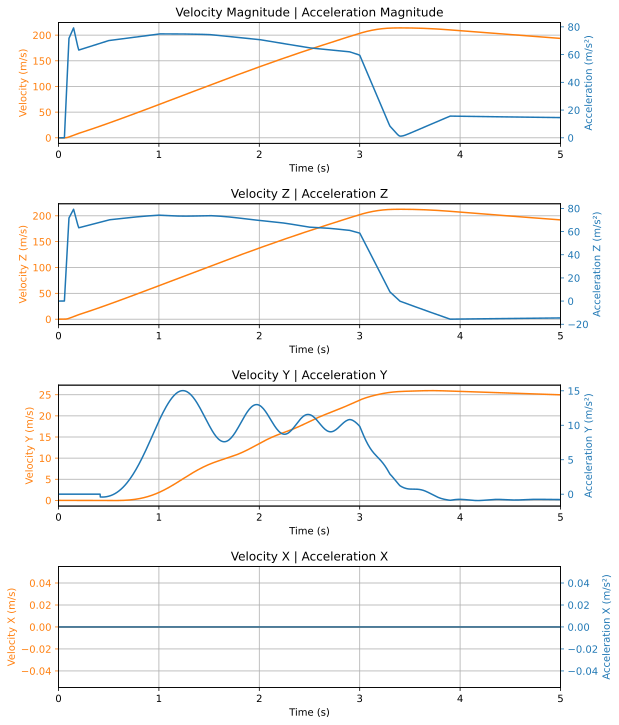



Angular Position Plots



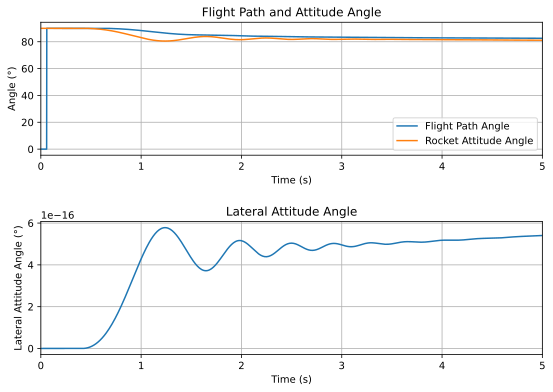



Path, Attitude and Lateral Attitude Angle plots



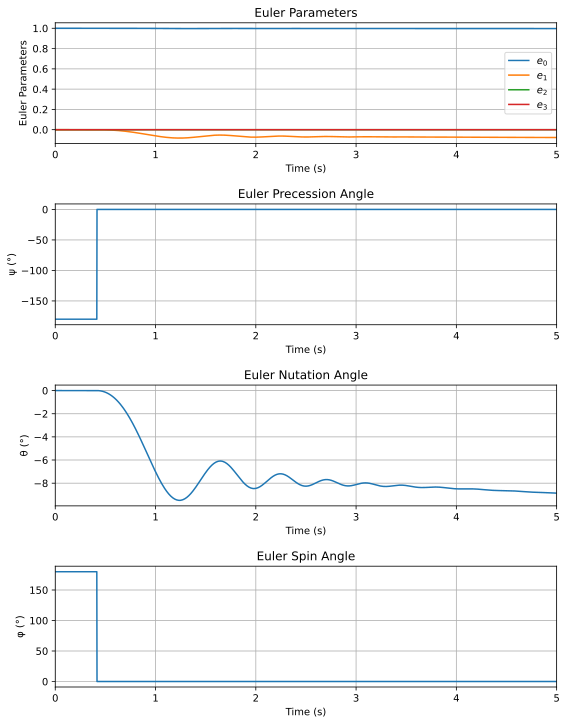



Trajectory Angular Velocity and Acceleration Plots



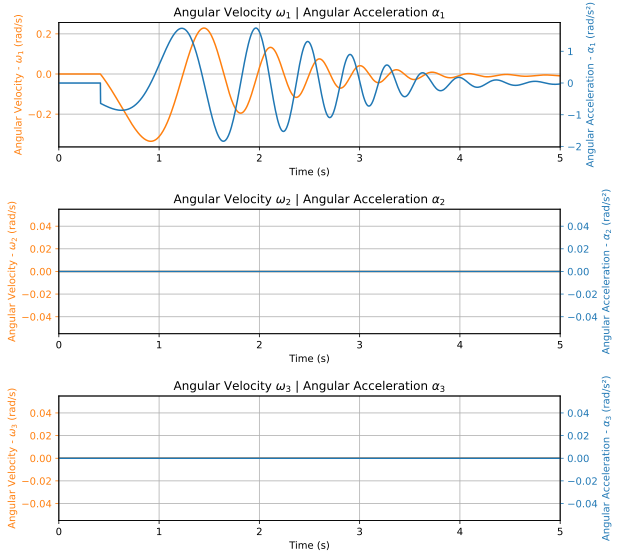



Aerodynamic Forces Plots



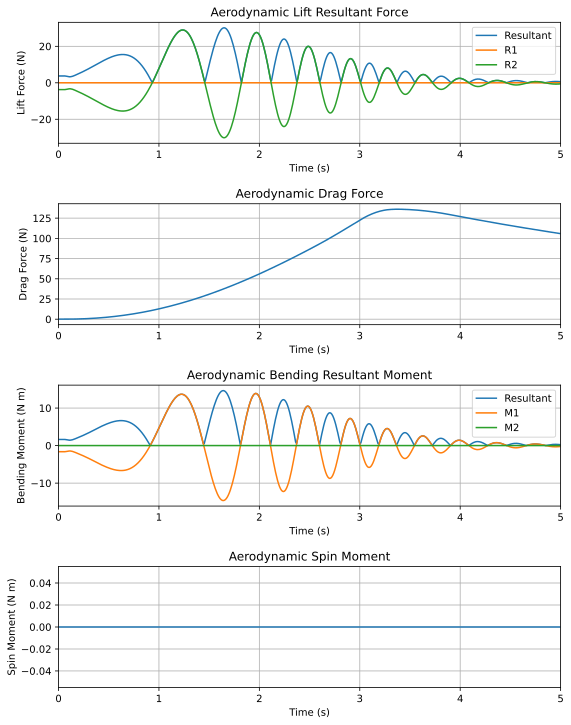



Rail Buttons Forces Plots



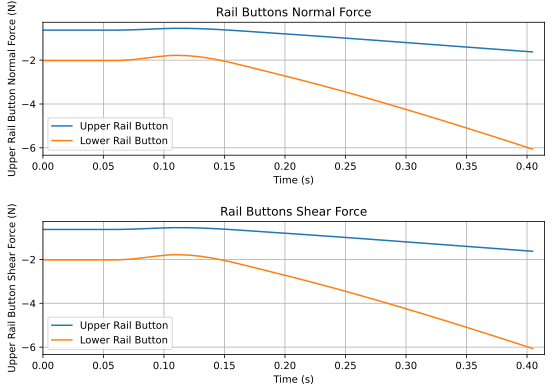



Trajectory Energy Plots



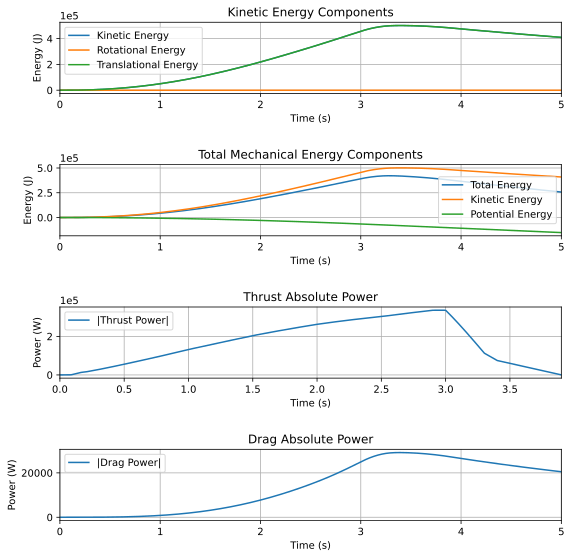



Trajectory Fluid Mechanics Plots



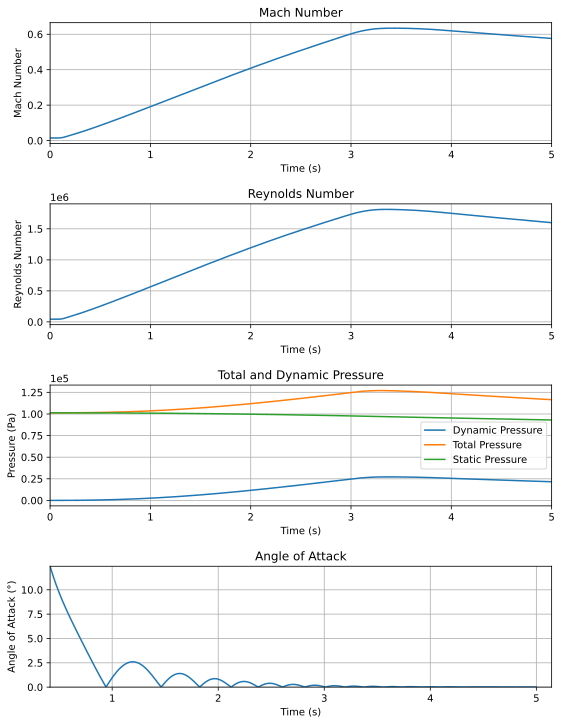



Trajectory Stability and Control Plots



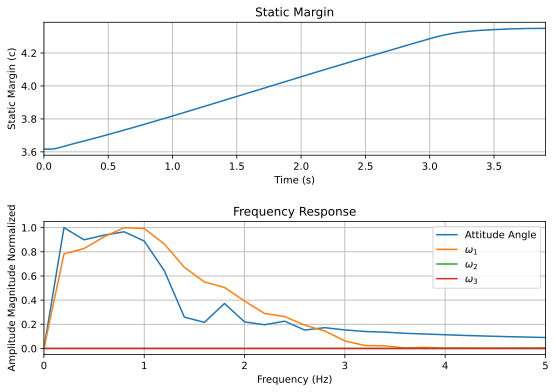



Rocket and Parachute Pressure Plots



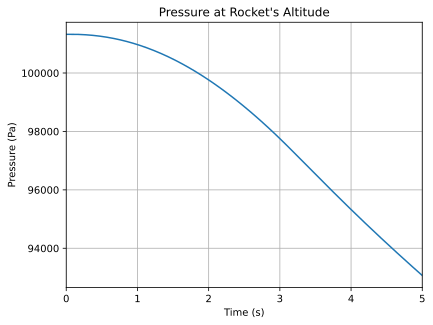


Rocket has no parachutes. No parachute plots available


In [53]:
test_flight.all_info()

Here is just a quick taste of what RocketPy is able to calculate. There are hundreds of plots and data points computed by RocketPy to enhance your analyses.

In [54]:
test_flight.export_kml(file_name="test_flight.kml")

File  test_flight.kml  saved with success!


Export Flight Trajectory to a .kml file so it can be opened on Google Earth


# Using Simulation for Design

1. Apogee as a Function of Mass

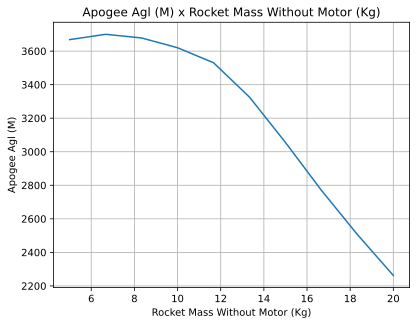

'Function from R1 to R1 : (Rocket Mass without motor (kg)) → (Apogee AGL (m))'

In [55]:
from rocketpy.utilities import apogee_by_mass

apogee_by_mass(flight=test_flight, min_mass=5, max_mass=20, points=10, plot=True)

### Dynamic Stability Analysis

Ever wondered how static stability translates into dynamic stability? Different static margins result in different dynamic behavior, which also depends on the rocket's rotational inertial.


Simulating Rocket with Static Margin of -0.926->-0.013 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 0.112->1.025 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 1.150->2.063 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 2.188->3.101 c
Simulation Completed at Time: 5.0000 s
Simulating Rocket with Static Margin of 3.225->4.139 c
Simulation Completed at Time: 5.0000 s


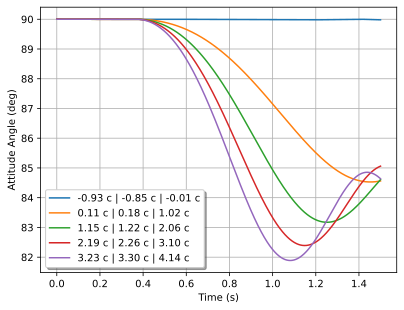

In [56]:
# Helper class
from rocketpy import Function
import copy

# Prepare a copy of the rocket
calisto2 = copy.deepcopy(calisto)

# Prepare Environment Class
custom_env = Environment()
custom_env.set_atmospheric_model(type="custom_atmosphere", wind_v=-5)

# Simulate Different Static Margins by Varying Fin Position
simulation_results = []

for factor in [-0.5, -0.2, 0.1, 0.4, 0.7]:
    # Modify rocket fin set by removing previous one and adding new one
    calisto2.aerodynamic_surfaces.pop(-1)

    fin_set = calisto2.add_trapezoidal_fins(
        n=4,
        root_chord=0.120,
        tip_chord=0.040,
        span=0.100,
        position=-1.04956 * factor,
    )
    # Simulate
    print(
        "Simulating Rocket with Static Margin of {:1.3f}->{:1.3f} c".format(
            calisto2.static_margin(0),
            calisto2.static_margin(calisto2.motor.burn_out_time),
        )
    )
    test_flight = Flight(
        rocket=calisto2,
        environment=custom_env,
        rail_length=5.2,
        inclination=90,
        heading=0,
        max_time_step=0.01,
        max_time=5,
        terminate_on_apogee=True,
        verbose=True,
    )
    # Store Results
    static_margin_at_ignition = calisto2.static_margin(0)
    static_margin_at_out_of_rail = calisto2.static_margin(test_flight.out_of_rail_time)
    static_margin_at_steady_state = calisto2.static_margin(test_flight.t_final)
    simulation_results += [
        (
            test_flight.attitude_angle,
            "{:1.2f} c | {:1.2f} c | {:1.2f} c".format(
                static_margin_at_ignition,
                static_margin_at_out_of_rail,
                static_margin_at_steady_state,
            ),
        )
    ]

Function.compare_plots(
    simulation_results,
    lower=0,
    upper=1.5,
    xlabel="Time (s)",
    ylabel="Attitude Angle (deg)",
)

# Characteristic Frequency Calculation

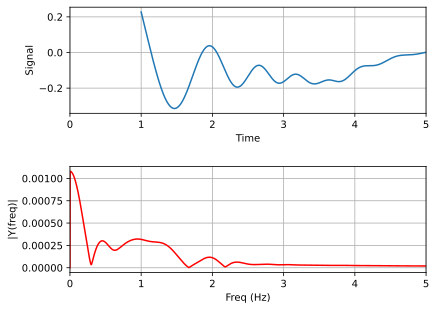

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate first 5 seconds of Flight
flight = Flight(
    rocket=calisto,
    environment=env,
    rail_length=5.2,
    inclination=90,
    heading=0,
    max_time_step=0.01,
    max_time=5,
)

# Perform a Fourier Analysis
Fs = 100.0
# sampling rate
Ts = 1.0 / Fs
# sampling interval
t = np.arange(1, 400, Ts)  # time vector
ff = 5
# frequency of the signal
y = flight.attitude_angle(t) - np.mean(flight.attitude_angle(t))
n = len(y)  # length of the signal
k = np.arange(n)
T = n / Fs
frq = k / T  # two sides frequency range
frq = frq[range(n // 2)]  # one side frequency range
Y = np.fft.fft(y) / n  # fft computing and normalization
Y = Y[range(n // 2)]

# Create the plot
fig, ax = plt.subplots(2, 1)
ax[0].plot(t, y)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Signal")
ax[0].set_xlim((0, 5))
ax[0].grid()
ax[1].plot(frq, abs(Y), "r")  # plotting the spectrum
ax[1].set_xlabel("Freq (Hz)")
ax[1].set_ylabel("|Y(freq)|")
ax[1].set_xlim((0, 5))
ax[1].grid()
plt.subplots_adjust(hspace=0.5)
plt.show()

# conclusion :
To implement machine learning in rocket simulation, you would typically need access to a vast amount of data, powerful computing resources, and domain expertise in both rocket science and machine learning. Additionally, you would need to integrate machine learning models with existing rocket simulation software and systems to provide real-time insights and decision support.

It's important to note that while machine learning can improve various aspects of rocket simulation, it's not a replacement for traditional physics-based modeling and simulation.

Individual contributer Name: Rajee singh sisodiya
date: 30/10/2023
Location-New Delhi (India)